# Gamestop stock vs Tesla

In [209]:
import yfinance as yf
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

In [212]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="The argument 'infer_datetime_format' is deprecated and will be removed in a future version.")

# define graphing Function

In [157]:
def make_graph(stock_data, revenue_data, stock):
    fig=make_subplots(rows=2, cols=1, shared_xaxes=True,subplot_titles=('Historical Share Price','Historical Revenue'), vertical_spacing=.3)
    stock_data_specific=stock_data[stock_data.Date<='2021-06-14']
    revenue_data_specific=revenue_data[revenue_data.date<='2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date,infer_datetime_format=True),y=stock_data_specific.Close.astype('float'),name='Share Price'),row=1,col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.date,infer_datetime_format=True),y=revenue_data_specific.revenue.astype('float'),name=' Revenue'),row=2,col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [75]:
tesla=yf.Ticker('TSLA')

In [76]:
tesla_data=tesla.history('max')

In [77]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [198]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [199]:
html_data=requests.get(url).text
# html_data

In [206]:
soup=BeautifulSoup(html_data,'html5lib')
teslaRevenue=pd.DataFrame(columns=['date','revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    
    new_row = pd.DataFrame({"date":[date], "revenue":[revenue]})
    teslaRevenue=teslaRevenue._append(new_row,ignore_index=True) # append has been depricated so use _append  

In [207]:
teslaRevenue["revenue"] = teslaRevenue['revenue'].str.replace('[,$]',"",regex=True)

In [208]:
teslaRevenue.dropna(inplace=True)
teslaRevenue = teslaRevenue[teslaRevenue['revenue'] != ""]

teslaRevenue.tail(5)
# teslaRevenue

,date,revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


# with panda object 

# Question 3 - Extracting GameStop Stock Data Using yfinance 

In [171]:
gameStop=yf.Ticker('GME')
gameStop_data=gameStop.history('max')

In [172]:
gameStop_data.reset_index(inplace=True)

In [182]:
gameStop_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [150]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [165]:
html_data=requests.get(url).text
soup=BeautifulSoup(html_data,'html5lib')
game_stop_revenue=pd.DataFrame(columns=['date','revenue'])

In [166]:
for row in soup.find_all('tbody')[1].find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    game_stop_revenue=game_stop_revenue._append({'date':date,'revenue':revenue},ignore_index=True)
# game_stop_data

In [183]:
game_stop_revenue['revenue']=game_stop_revenue['revenue'].str.replace('[$,]','',regex=True)
game_stop_revenue.dropna()
game_stop_revenue.tail(5)

,date,revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


# Question 5 - Tesla Stock and Revenue Dashboard

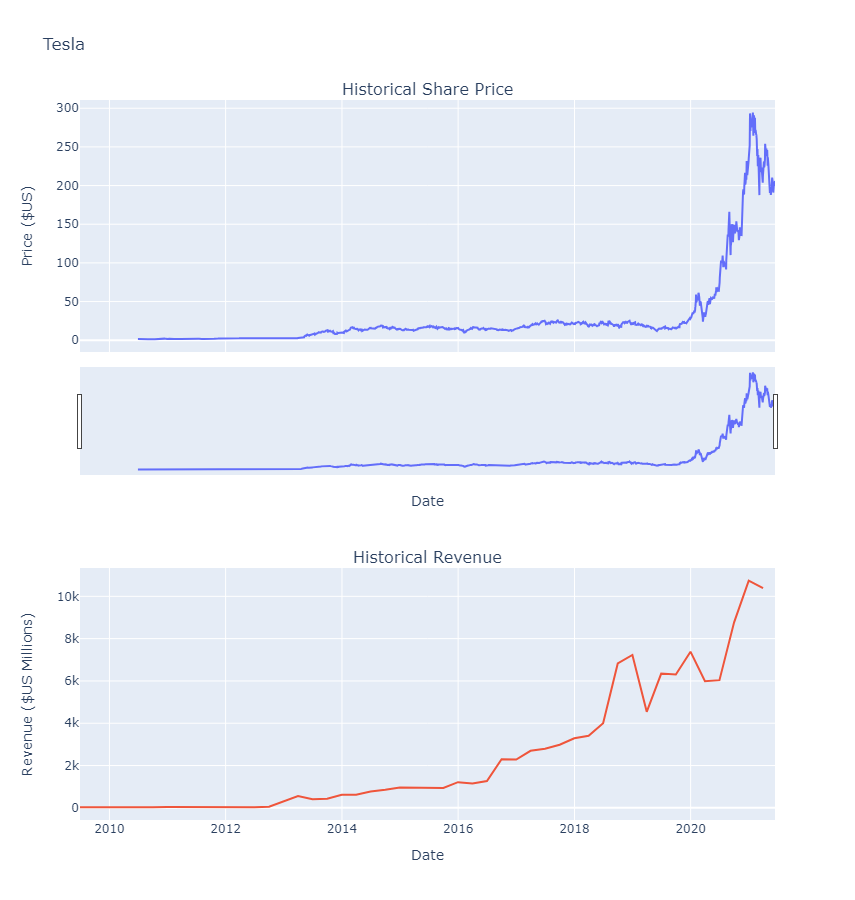

In [213]:
make_graph(tesla_data,teslaRevenue,'Tesla')

# Question 6 - GameStop Stock and Revenue Dashboard

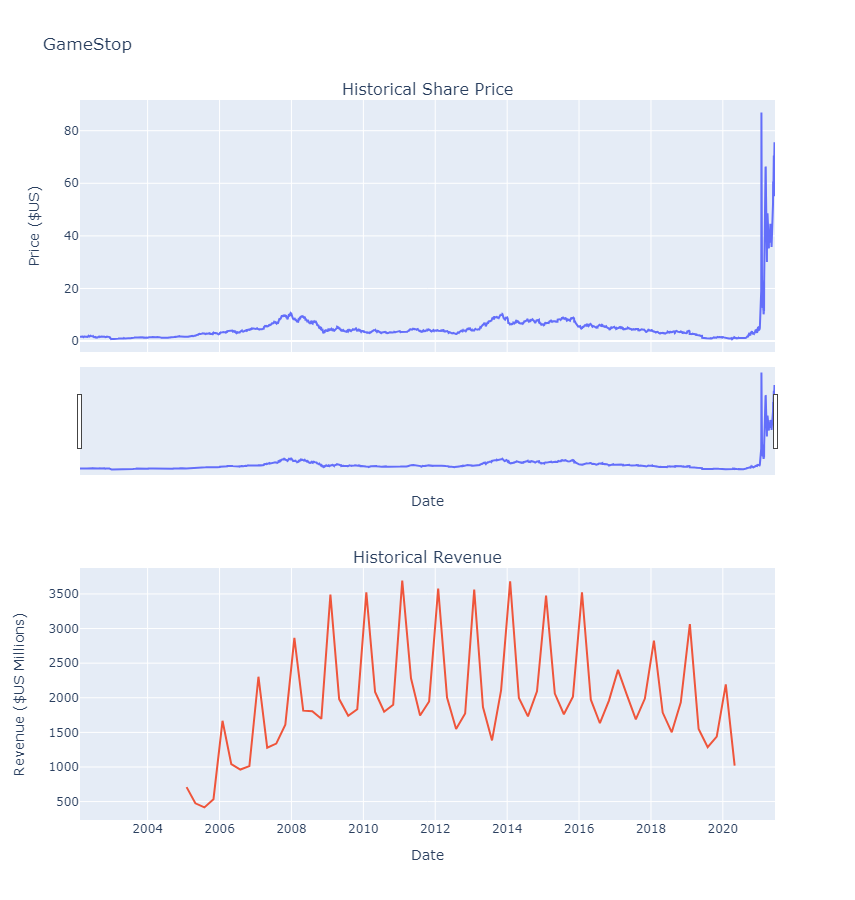

In [214]:
make_graph(gameStop_data,game_stop_revenue,'GameStop')